### Billionaires Analysis with Python

The dataset that I am using to analyze the data about billionaires around the world was curated by Forbes and is downloaded from Kaggle. The dataset contains information about global billionaires in 2021, including their:

1. Names

2. Net Worth 

3. Country 

4. Source 

5. Rank

6. Age

7. Industry

So let’s get started with the task of billionaires analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/akshukla283/Machine-Learning-Projects-for-Beginners/main/Billionaire.csv")

In [5]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [6]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

So this dataset has 79 missing values in the Age column, let’s remove these rows:

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [9]:
data.head(2)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive


The NetWorth column in this dataset has a $ sign at the beginning of Billionaires’ Net worth and B at the end. So we need to remove these signs and convert the NetWorth column to float:

In [10]:
data["NetWorth"]= data["NetWorth"].str.strip("$")
data["NetWorth"]= data["NetWorth"].str.strip("B")
data["NetWorth"]= data["NetWorth"].astype(float)


In [11]:
data.head(2)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive


Now let’s have a look at the top 10 billionaires according to their NetWorth:

In [13]:
df = data.sort_values(by = ["NetWorth"], ascending=False).head(10)
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


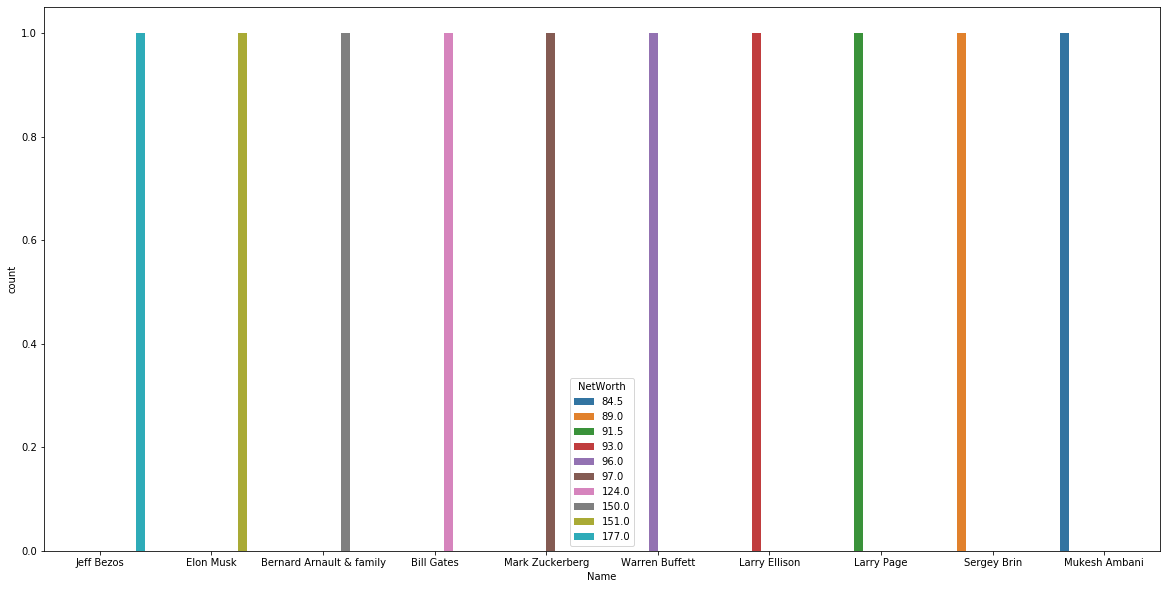

In [20]:
df = data.sort_values(by = ["NetWorth"], ascending=False).head(10)
plt.figure(figsize = (20, 10))
sns.countplot(x="Name", hue="NetWorth", data=df)

Now let’s have a look at the top 5 domains with the most number of billionaires:

In [21]:
data["Source"].value_counts()

real estate              169
pharmaceuticals           96
investments               89
diversified               78
software                  61
                        ... 
fashion investments        1
aluminum, utilities        1
tourism, construction      1
Shipping                   1
industrial equipment       1
Name: Source, Length: 909, dtype: int64

In [22]:
data["Source"].value_counts().head()

real estate        169
pharmaceuticals     96
investments         89
diversified         78
software            61
Name: Source, dtype: int64

In [23]:
data["Source"].value_counts().head().index

Index(['real estate', 'pharmaceuticals', 'investments', 'diversified',
       'software'],
      dtype='object')

In [24]:
data["Source"].value_counts().head().values

array([169,  96,  89,  78,  61], dtype=int64)

Text(0.5, 1.0, 'Top 5 Domains to Become a Billionaire')

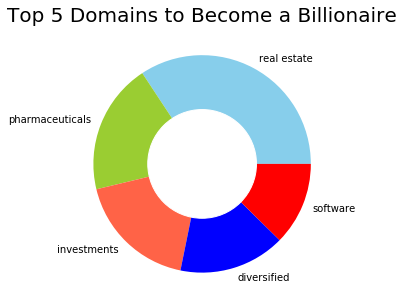

In [25]:
a = data["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Domains to Become a Billionaire", fontsize=20)


Now let’s have a look at the top 5 industries with the most number of billionaires:

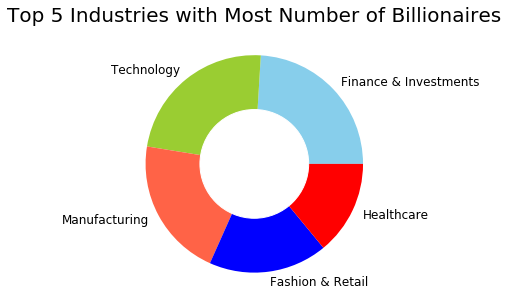

In [25]:
a = data["Industry"].value_counts().head()
index = a.index
industries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(industries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Industries with Most Number of Billionaires", fontsize=20)
plt.show()

Now let’s have a look at the top 5 countries with the most number of billionaires:

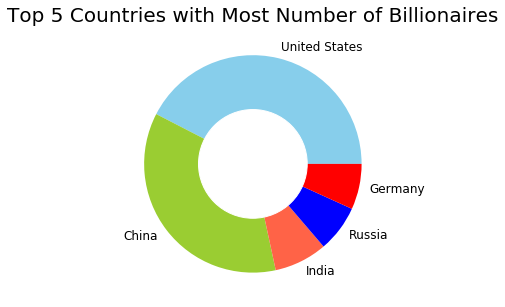

In [26]:
a = data["Country"].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Countries with Maost Number of Billionaires", fontsize=20)
plt.show()